## SMS Spam Collection Dataset

Collection of SMS messages tagged as spam or legitimate

Source: https://www.kaggle.com/uciml/sms-spam-collection-dataset

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from keras.models import Model
from keras.layers import LSTM, Activation, Dense, Dropout, Input, Embedding
from keras.optimizers import RMSprop
from keras.preprocessing.text import Tokenizer
from keras.preprocessing import sequence
from keras.utils import to_categorical
from keras.callbacks import EarlyStopping
%matplotlib inline

## Explore the dataset

In [9]:
#utilise spam sms dataset
import io
sms_df = pd.read_csv("spam.csv",delimiter=',',encoding='latin-1')
sms_df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [10]:
sms_df.columns

Index(['v1', 'v2', 'Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], dtype='object')

In [11]:
# Drop the columns that are not required for the neural network.
sms_df.drop(['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'],axis=1,inplace=True)
sms_df.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [12]:
sms_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   v1      5572 non-null   object
 1   v2      5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


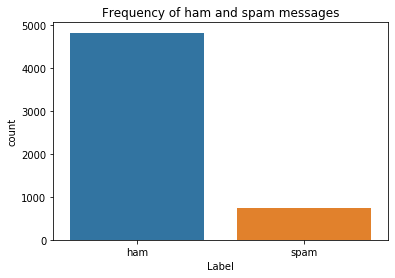

In [14]:
# Understand the distribution better.
sns.countplot(sms_df.v1)
plt.xlabel('Label')
plt.title('Frequency of ham and spam messages');

In [16]:
x = sms_df.v2
x.head()

0    Go until jurong point, crazy.. Available only ...
1                        Ok lar... Joking wif u oni...
2    Free entry in 2 a wkly comp to win FA Cup fina...
3    U dun say so early hor... U c already then say...
4    Nah I don't think he goes to usf, he lives aro...
Name: v2, dtype: object

In [17]:
y = sms_df.v1
y.head()

0     ham
1     ham
2    spam
3     ham
4     ham
Name: v1, dtype: object

## Normalise the data

In [18]:
le = LabelEncoder()
y = le.fit_transform(y)
y

array([0, 0, 1, ..., 0, 0, 0])

In [19]:
y.shape

(5572,)

In [20]:
y = y.reshape(-1,1)
y.shape

(5572, 1)

## Split into training and test data.

In [21]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20)

In [23]:
print("X train shape: ",x_train.shape)
print("y train shape: ",y_train.shape)
print("X test shape: ",x_test.shape)
print("y test shape: ",y_test.shape)


X train shape:  (4457,)
y train shape:  (4457, 1)
X test shape:  (1115,)
y test shape:  (1115, 1)


## Process data 

In [24]:
#Tokenize the content from the message.

#Max words was chosen arbitrary
max_words = 1200

#Define the content lengths. If more than the max lenght, trucate it. If less, fill it wit zeros
#Source:https://www.tensorflow.org/api_docs/python/tf/keras/preprocessing/sequence/pad_sequences
# https://keras.io/api/preprocessing/text/
# https://machinelearningmastery.com/prepare-text-data-deep-learning-keras/
# https://www.tensorflow.org/api_docs/python/tf/keras/preprocessing/text/Tokenizer
# https://www.tensorflow.org/api_docs/python/tf/keras/preprocessing/sequence/pad_sequences
# https://stackoverflow.com/questions/42943291/what-does-keras-io-preprocessing-sequence-pad-sequences-do

max_len = 200
tok = Tokenizer(num_words=max_words)
tok.fit_on_texts(x_train)
tok

In [26]:
# Transforms each text in a sequence of integers.
sequences = tok.texts_to_sequences(x_train)
sequences

[[116,
  14,
  564,
  1,
  138,
  4,
  918,
  19,
  1,
  138,
  20,
  847,
  565,
  1,
  58,
  23,
  25,
  66,
  80,
  5,
  847,
  24,
  157,
  271,
  1,
  205,
  241,
  1102,
  8,
  11,
  918,
  19,
  71,
  58,
  797,
  34,
  25,
  290,
  8,
  5,
  466],
 [35, 349, 735, 5, 100, 228, 9, 181, 848, 18],
 [29, 28, 16, 4, 55, 64],
 [95, 77, 31, 192, 2, 30, 45, 189, 7, 81, 566, 51],
 [207,
  115,
  48,
  50,
  172,
  7,
  12,
  158,
  39,
  8,
  420,
  421,
  45,
  2,
  10,
  7,
  406,
  33,
  1,
  454,
  23,
  1,
  57,
  5,
  200,
  8],
 [1, 61, 2, 1103, 7, 11],
 [257, 19, 58, 5, 200, 304, 1, 58, 258, 166],
 [1,
  138,
  4,
  55,
  65,
  128,
  60,
  214,
  2,
  28,
  175,
  4,
  313,
  919,
  37,
  11,
  12,
  4,
  538,
  81,
  224,
  208],
 [672,
  137,
  251,
  279,
  997,
  12,
  20,
  9,
  539,
  17,
  22,
  141,
  259,
  849,
  50,
  43,
  52,
  97,
  173,
  54],
 [109, 636, 8, 12, 4, 325, 920],
 [3, 26, 260, 244, 3, 69, 2, 365, 103],
 [144, 268, 1104, 30, 4, 673, 27, 69, 10, 2, 63, 

In [27]:
sequences_matrix = sequence.pad_sequences(sequences,maxlen=max_len)
sequences_matrix

array([[  0,   0,   0, ...,   8,   5, 466],
       [  0,   0,   0, ..., 181, 848,  18],
       [  0,   0,   0, ...,   4,  55,  64],
       ...,
       [  0,   0,   0, ..., 202,   2,  10],
       [  0,   0,   0, ...,   1,  58, 757],
       [  0,   0,   0, ..., 276, 836, 358]])

## RNN model

In [28]:
# https://keras.io/api/layers/core_layers/embedding/
# https://machinelearningmastery.com/use-word-embedding-layers-deep-learning-keras/
# https://keras.io/api/layers/recurrent_layers/lstm/

def RNN():
    i = Input(name='inputs',shape=[max_len])
    x = Embedding(max_words,50,input_length=max_len)(i)
    x = LSTM(64)(x) 
    x = Dense(256,name='FC1')(x)
    x = Activation('relu')(x)
    x = Dropout(0.5)(x)
    x = Dense(1,name='out_layer')(x)
    x = Activation('sigmoid')(x)
    model = Model(inputs=i,outputs=x)
    return model

In [29]:
# Call the function and compile the model.
model = RNN()
model.summary()
model.compile(loss='binary_crossentropy',optimizer=RMSprop(),metrics=['accuracy'])

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
inputs (InputLayer)          [(None, 200)]             0         
_________________________________________________________________
embedding (Embedding)        (None, 200, 50)           60000     
_________________________________________________________________
lstm (LSTM)                  (None, 64)                29440     
_________________________________________________________________
FC1 (Dense)                  (None, 256)               16640     
_________________________________________________________________
activation (Activation)      (None, 256)               0         
_________________________________________________________________
dropout (Dropout)            (None, 256)               0         
_________________________________________________________________
out_layer (Dense)            (None, 1)                 257   

In [30]:
# Fit on the training data.
r = model.fit(sequences_matrix,y_train,batch_size=128,epochs=10,
          validation_split=0.2,callbacks=[EarlyStopping(monitor='val_loss',min_delta=0.0001)])

# The hyperparameter 'patience' could work as well
# https://keras.io/api/callbacks/early_stopping/
# https://stackoverflow.com/questions/50284898/keras-earlystopping-which-min-delta-and-patience-to-use

Epoch 1/10
28/28 [==============================] - 12s 284ms/step - loss: 0.4696 - accuracy: 0.8380 - val_loss: 0.1984 - val_accuracy: 0.9193
Epoch 2/10
28/28 [==============================] - 7s 261ms/step - loss: 0.1315 - accuracy: 0.9634 - val_loss: 0.0707 - val_accuracy: 0.9798
Epoch 3/10
28/28 [==============================] - 7s 265ms/step - loss: 0.0443 - accuracy: 0.9865 - val_loss: 0.0561 - val_accuracy: 0.9821
Epoch 4/10
28/28 [==============================] - 8s 269ms/step - loss: 0.0283 - accuracy: 0.9926 - val_loss: 0.0652 - val_accuracy: 0.9843


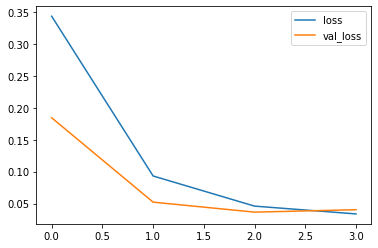

In [ ]:
# Plot loss per iteration
import matplotlib.pyplot as plt
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()

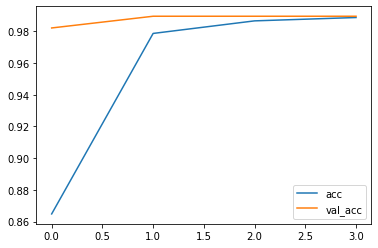

In [ ]:
# Plot accuracy per iteration
plt.plot(r.history['accuracy'], label='acc')
plt.plot(r.history['val_accuracy'], label='val_acc')
plt.legend()

The model performs well on the validation set and this configuration is chosen as the final model.


In [ ]:
# Process the test set data.
test_sequences = tok.texts_to_sequences(X_test)
test_sequences_matrix = sequence.pad_sequences(test_sequences,maxlen=max_len)

In [ ]:
# Evaluate the model on the test set.
accr = model.evaluate(test_sequences_matrix,Y_test)

27/27 [==============================] - 0s 17ms/step - loss: 0.0606 - accuracy: 0.9821


In [ ]:
print('Test set\n  Loss: {:0.3f}\n  Accuracy: {:0.3f}'.format(accr[0],accr[1]))

Test set
  Loss: 0.061
  Accuracy: 0.982


**Happy Learning**

https://www.kaggle.com/shahules/zomato-complete-eda-and-lstm-model